In [267]:
# The inline flag will use the appropriate backend to make figures appear inline in the notebook
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# seaborn libbbrary is wrapper of matplotlib
import seaborn as sns

In [268]:
# Load car loan data into a pandas dataframe from a file
filename = 'data/table_i702t60.csv'
carloans = pd.read_csv(filename)
carloans.head()

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type
0,1,34689.96,202.93,484.30,34205.66,0.0702,Toyota Sienna
1,2,34205.66,200.10,487.13,33718.53,0.0702,Toyota Sienna
2,3,33718.53,197.25,489.98,33228.55,0.0702,Toyota Sienna
3,4,33228.55,194.38,492.85,32735.70,0.0702,Toyota Sienna
4,5,32735.70,191.50,495.73,32239.97,0.0702,Toyota Sienna


In [269]:
carloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             60 non-null     int64  
 1   starting_balance  60 non-null     float64
 2   interest_paid     60 non-null     float64
 3   principal_paid    60 non-null     float64
 4   new_balance       60 non-null     float64
 5   interest_rate     60 non-null     float64
 6   car_type          60 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


In [270]:
# look for missing row
interest_missing = carloans['interest_paid'].isna()
carloans.loc[interest_missing, :]

,month,starting_balance,interest_paid,principal_paid,new_balance,interest_rate,car_type


In [271]:
# apply rate as linear
carloans['interest_paid'][30:40].interpolate(method='linear')

30    110.32
31    106.94
32    103.55
33    100.13
34     96.70
35     93.24
36     89.77
37     86.27
38     82.76
39     79.22
Name: interest_paid, dtype: float64

In [272]:
interest_paid = carloans.loc[:, 'interest_paid'].values
interest_paid
# this still return a nan value in result. don't forget to grab the value from the linear result to fill in the missing rate

array([202.93, 200.1 , 197.25, 194.38, 191.5 , 188.6 , 185.68, 182.75,
       179.8 , 176.83, 173.84, 170.84, 167.82, 164.78, 161.72, 158.65,
       155.56, 152.45, 149.32, 146.17, 143.01, 139.82, 136.62, 133.4 ,
       130.16, 126.9 , 123.62, 120.33, 117.01, 113.67, 110.32, 106.94,
       103.55, 100.13,  96.7 ,  93.24,  89.77,  86.27,  82.76,  79.22,
        75.67,  72.09,  68.49,  64.87,  61.23,  57.57,  53.88,  50.18,
        46.45,  42.7 ,  38.93,  35.14,  31.33,  27.49,  23.63,  19.75,
        15.84,  11.91,   7.96,   3.99])

In [273]:
# assign the linear result to the data
carloans.loc[interest_missing, 'interest_paid'] = 93.235
new_interest_paid = carloans.loc[:, 'interest_paid'].values
new_interest_paid

array([202.93, 200.1 , 197.25, 194.38, 191.5 , 188.6 , 185.68, 182.75,
       179.8 , 176.83, 173.84, 170.84, 167.82, 164.78, 161.72, 158.65,
       155.56, 152.45, 149.32, 146.17, 143.01, 139.82, 136.62, 133.4 ,
       130.16, 126.9 , 123.62, 120.33, 117.01, 113.67, 110.32, 106.94,
       103.55, 100.13,  96.7 ,  93.24,  89.77,  86.27,  82.76,  79.22,
        75.67,  72.09,  68.49,  64.87,  61.23,  57.57,  53.88,  50.18,
        46.45,  42.7 ,  38.93,  35.14,  31.33,  27.49,  23.63,  19.75,
        15.84,  11.91,   7.96,   3.99])

In [274]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [275]:
month_number = carloans.loc[:, 'month'].values
month_number

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [276]:
principal_paid = carloans.loc[:, 'principal_paid']
principal_paid

0     484.30
1     487.13
2     489.98
3     492.85
4     495.73
5     498.63
6     501.55
7     504.48
8     507.43
9     510.40
10    513.39
11    516.39
12    519.41
13    522.45
14    525.51
15    528.58
16    531.67
17    534.78
18    537.91
19    541.06
20    544.22
21    547.41
22    550.61
23    553.83
24    557.07
25    560.33
26    563.61
27    566.90
28    570.22
29    573.56
30    576.91
31    580.29
32    583.68
33    587.10
34    590.53
35    593.99
36    597.46
37    600.96
38    604.47
39    608.01
40    611.56
41    615.14
42    618.74
43    622.36
44    626.00
45    629.66
46    633.35
47    637.05
48    640.78
49    644.53
50    648.30
51    652.09
52    655.90
53    659.74
54    663.60
55    667.48
56    671.39
57    675.32
58    679.27
59    683.24
Name: principal_paid, dtype: float64

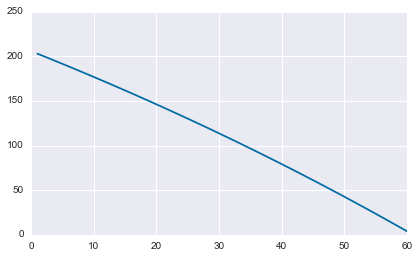

In [277]:
plt.plot(month_number[:60], new_interest_paid[:60])

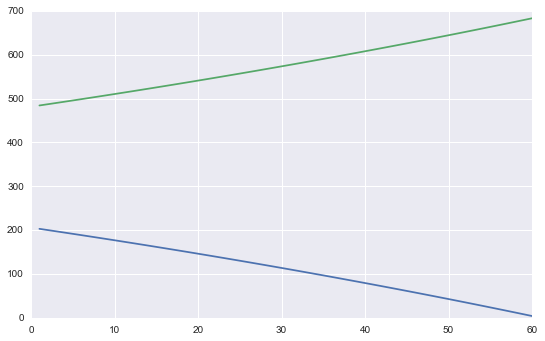

In [278]:
# 2 line on the same graph 
plt.style.use('seaborn')
plt.plot(month_number[:60], new_interest_paid[:60])
plt.plot(month_number[:60], principal_paid[:60])

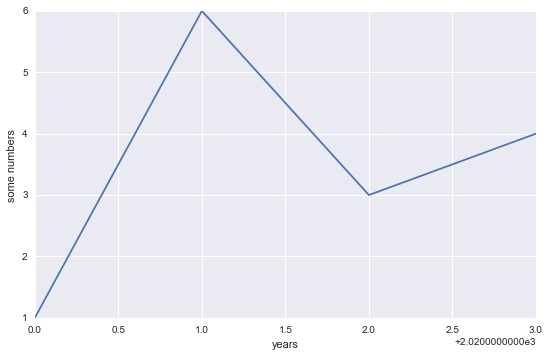

In [279]:
import matplotlib.pyplot as plt
plt.plot([2020,2021,2022,2023],[1,6,3,4])
plt.ylabel('some numbers')
plt.xlabel('years')
plt.show()

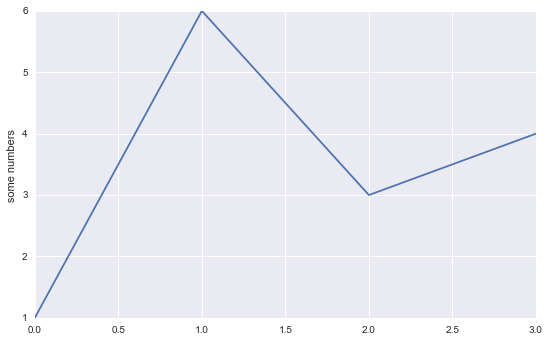

In [280]:
import matplotlib.pyplot as plt
plt.plot([1,6,3,4])
plt.ylabel('some numbers')
plt.show()

In [281]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

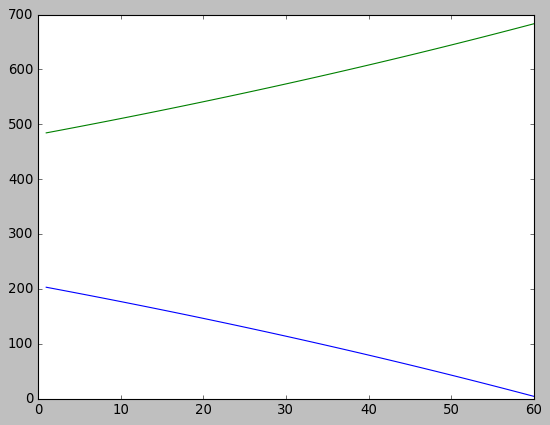

In [282]:
plt.style.use('classic')
plt.plot(month_number, new_interest_paid)
plt.plot(month_number, principal_paid)


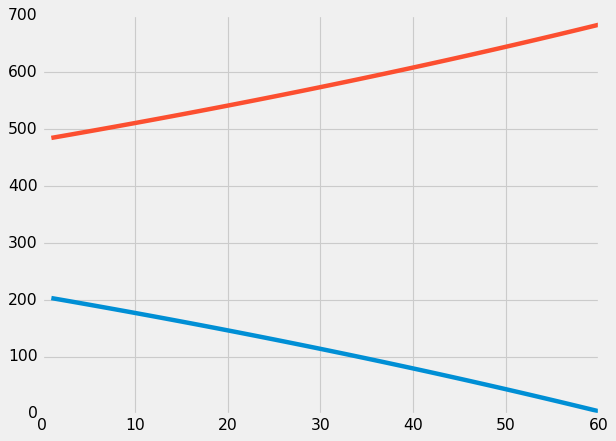

In [283]:
plt.style.use('fivethirtyeight')
plt.plot(month_number[:60], new_interest_paid[:60])
plt.plot(month_number[:60], principal_paid[:60])

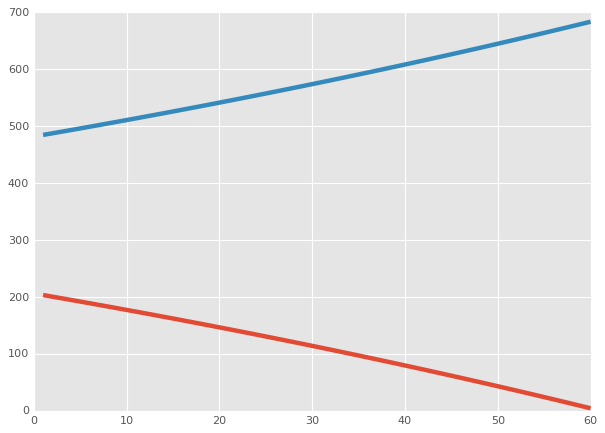

In [284]:
plt.style.use('ggplot')
plt.plot(month_number[:60], new_interest_paid[:60])
plt.plot(month_number[:60], principal_paid[:60])

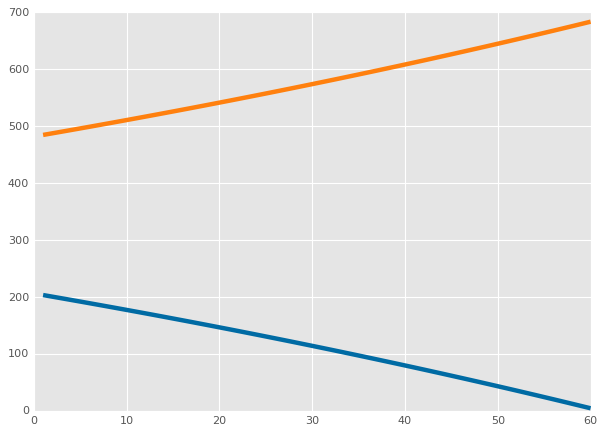

In [285]:
plt.style.use('tableau-colorblind10')
plt.plot(month_number[:60], new_interest_paid[:60])
plt.plot(month_number[:60], principal_paid[:60])

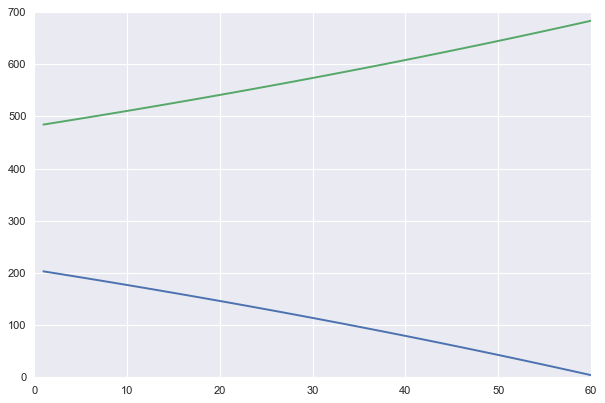

In [286]:
plt.style.use('seaborn')
plt.plot(month_number[:60], new_interest_paid[:60])
plt.plot(month_number[:60], principal_paid[:60])

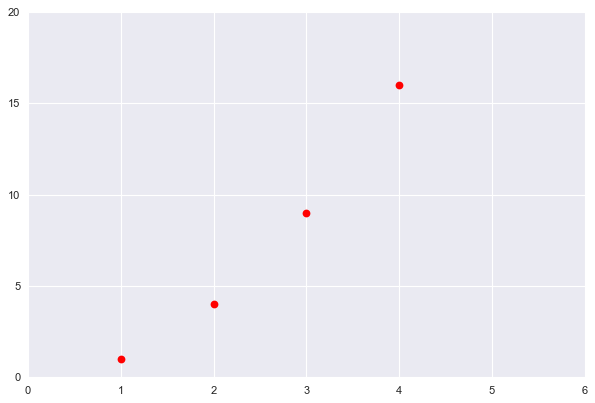

In [287]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

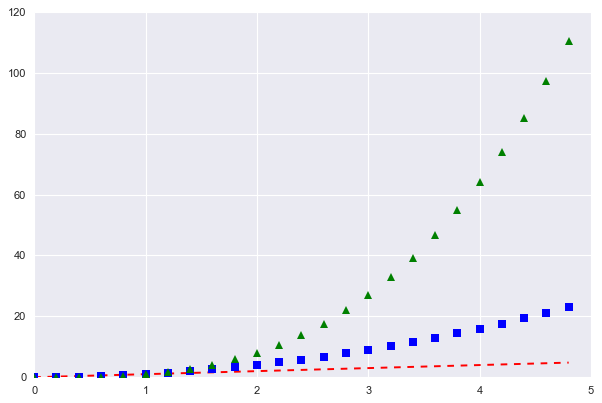

In [288]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

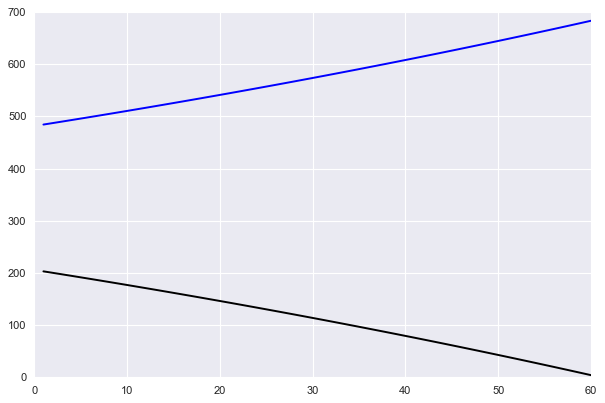

In [289]:
# MATLAB-style plotting
plt.style.use('tableau-colorblind10')
plt.plot(month_number, new_interest_paid, c='k')
plt.plot(month_number, principal_paid, c='b')

In [294]:
# Object-oriented
x, y = (3,9)
fig, axes = plt.subplot(nrow = 1, ncols = 1)
axes.plot(month_number, new_interest_paid, c='k')
axes.plot(month_number, principal_paid, c='b')

TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?